C:\Users\raboc\AppData\Local\Temp\ipykernel_8836\3562280553.py:49: RuntimeWarning: invalid value encountered in scalar divide
  self.acceleration[k] += grav_const*planets[i].mass*(difference[k][0])*1/(pow(square_distance[0], 3/2))


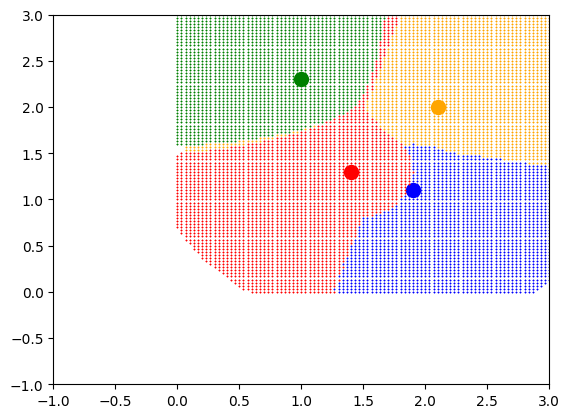

In [20]:
import numpy as np
import matplotlib.pyplot as plt

class Particle:
    """
    Represents a point mass with position, velocity, and acceleration vectors.
    """
    def __init__(self, position=None, velocity=None, acceleration=None, dim=2, mass=1):
        self.dim = dim
        self.mass = mass

        vector_attributes = {
            "position": position,
            "velocity": velocity,
            "acceleration": acceleration,
        }

        #This is so that it can have arbitrary dimension, but also default zero values
        for attr_name, attr_value in vector_attributes.items():
            if attr_value is None:
                setattr(self, attr_name, np.zeros(self.dim))
            else:
                setattr(self, attr_name, attr_value)

            current_vector = getattr(self, attr_name)
            if len(current_vector) != self.dim:
                 raise ValueError(
                    f"{attr_name} vector length ({len(current_vector)}) must match dimension ({self.dim})."
                )
            
    #guide for printing itself
    def __repr__(self):
        return (
            f"Particle(dim={self.dim}, mass={self.mass})\n"
            f"  Pos: {self.position}\n"
            f"  Vel: {self.velocity}\n"
            f"  Acc: {self.acceleration}"
        )
    
    #Updates the acceleration using the positions of the sources of gravitation using Newton's second law and his law for gravitation
    def update_acceleration(self, planets):
        for i in range(len(planets)):
            square_distance = 0
            difference = np.zeros(shape = (self.dim,1))
            for j in range(self.dim):
                difference[j] = planets[i].position[j] - self.position[j]
                square_distance += difference[j]**2
            for k in range(self.dim):
                self.acceleration[k] += grav_const*planets[i].mass*(difference[k][0])*1/(pow(square_distance[0], 3/2))
    
    def check_for_collision(self, planets):
        for i in range(len(planets)):
            square_distance = 0
            difference = np.zeros(shape = (self.dim,1))
            for j in range(self.dim):
                difference[j] = planets[i].position[j] - self.position[j]
                square_distance += difference[j]**2
            if(planets[i].radius**2 >= square_distance):
                return i
        return -1
                                

#Same as particle, but has radius attribute
class Planet(Particle):
    def __init__(self, position=None, velocity=None, acceleration=None, dim=2, mass=1, radius=5*10e-2):
        super().__init__(position=position, velocity=velocity, acceleration=acceleration, dim=dim, mass=mass)
        self.radius = radius

    #guide for printing itself
    def __repr__(self):
        return (
            f"Planet(dim={self.dim}, mass={self.mass}, radius={self.radius})\n"
            f"  Pos: {self.position}\n"
            f"  Vel: {self.velocity}\n"
            f"  Acc: {self.acceleration}"
        )

#The way it's implemented here, it advances the time for a passed particle with dt
def velocity_verlet(particle, planets, dt):
    particle.update_acceleration(planets)
    for i in range(particle.dim):
        particle.position[i] += particle.velocity[i]*dt + 0.5*particle.acceleration[i]*dt**2
        particle.velocity[i] += 0.5*particle.acceleration[i]*dt**2
    particle.update_acceleration(planets)
    for i in range(particle.dim):
        particle.velocity[i] += 0.5*particle.acceleration[i]*dt**2

#Simulation constants
grav_const = 1
dim = 2
dt = 10e-3  
iter = 100  
planet_number = len(planets)
planets = [Planet([1.4,1.3]), Planet([1,2.3]), Planet([1.9,1.1]), Planet([2.1,2])]
myparticle = Particle()



# --- Trajectory mode - Traces out the trajectory of a particle. Currently only for dim = 2 (!) ---
trajectory_mode = False
if trajectory_mode:
    #Plotting planets
    for i in range(planet_number):
        plt.scatter(planets[i].position[0], planets[i].position[1], c = 'red', s = 100)

    #Plotting particle
    trajectory = np.zeros(shape=(iter, dim))
    for i in range(iter):
        trajectory[i] = myparticle.position
        velocity_verlet(myparticle, planets, dt)
    for i in range(iter):
        plt.scatter(trajectory[i][0], trajectory[i][1], c= 'green', s=1)



# --- Convergence map mode - Colors R^dim according to which planet the particle crashes into first. Currently only for dim = 2 (!) ---
convergence_map_mode = True
if convergence_map_mode:
    #This isn't very elegant but I'm having trouble with the plotting part
    color_list = ['red', 'green', 'blue', 'orange', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan']
    #Plotting planets
    for i in range(planet_number):
        plt.scatter(planets[i].position[0], planets[i].position[1], c = color_list[i], s = 100)
    
    bounds = [[0,5], [0,5]]
    samples_per_row = 150
    samples_per_column = 150
    for i in range(samples_per_column):
        for j in range(samples_per_row):
            myparticle = Particle()
            myparticle.position = [(bounds[0][1]-bounds[0][0])*(1/samples_per_row)*i,(bounds[1][1]-bounds[1][0])*(1/samples_per_column)*j]
            starting_position = np.copy(myparticle.position)
            coll = -1
            for k in range(iter):
                velocity_verlet(myparticle, planets, dt)
                coll = myparticle.check_for_collision(planets)
                if(coll > -1):
                    plt.scatter(starting_position[0], starting_position[1], c = color_list[coll], marker = '*', s =0.1)
                    break

plt.xlim(-1,3)
plt.ylim(-1,3)
plt.show()
